In [1]:
# import kagglehub
 
# import os
# import shutil

# download_folder = "./datasets/telecom_crm"
# # Step 1: Download the dataset
# download_path = kagglehub.dataset_download("krishnacheedella/telecom-iot-crm-dataset")
 
# if not os.path.exists(download_folder):
#     shutil.move(download_path, download_folder)

# print("✅ Dataset moved to:", download_folder)


In [2]:
# import os
# import pandas as pd
# import sqlite3

# # Paths
# csv_folder = "./datasets/telecom_crm"
# sqlite_file = "telecom_crm.db"

# # Step 1: Convert first 10,000 rows from each CSV to SQLite tables
# for file in os.listdir(csv_folder):
#     if file.endswith(".csv"):
#         file_path = os.path.join(csv_folder, file)
#         table_name = os.path.splitext(file)[0].replace("-", "_").replace(" ", "_")

#         # Read first 10,000 rows only
#         df = pd.read_csv(file_path, nrows=10000)

#         # Write to SQLite
#         with sqlite3.connect(sqlite_file) as conn:
#             df.to_sql(table_name, conn, if_exists="replace", index=False)

#         print(f" Loaded first 10,000 rows of '{file}' into table '{table_name}'")

# # Step 2: Print SQLite schema
# print("\n  Database Schema:\n" + "-"*50)

# with sqlite3.connect(sqlite_file) as conn:
#     cursor = conn.cursor()

#     cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#     tables = cursor.fetchall()

#     for (table_name,) in tables:
#         print(f"\n🔹 Table: {table_name}")
#         cursor.execute(f"PRAGMA table_info({table_name});")
#         for col in cursor.fetchall():
#             col_id, name, dtype, notnull, default, pk = col
#             print(f"  - {name} ({dtype}){' [PK]' if pk else ''}")

# print("\n  Done.")


In [3]:
# import sqlite3

# db_file = "telecom_crm.db"

# with sqlite3.connect(db_file) as conn:
#     cursor = conn.cursor()
#     cursor.execute("PRAGMA foreign_keys = ON;")

#     # Step 1: Rename old tables
#     cursor.executescript("""
#     ALTER TABLE device1 RENAME TO old_device1;
#     ALTER TABLE rev1 RENAME TO old_rev1;
#     ALTER TABLE crm1 RENAME TO old_crm1;
#     """)

#     # Step 2: Recreate tables with correct schema and foreign keys
#     cursor.executescript("""
#     CREATE TABLE crm1 (
#         msisdn TEXT PRIMARY KEY,
#         gender TEXT,
#         year_of_birth INTEGER,
#         system_status TEXT,
#         mobile_type TEXT,
#         value_segment TEXT
#     );

#     CREATE TABLE device1 (
#         msisdn TEXT,
#         imei_tac TEXT,
#         brand_name TEXT,
#         model_name TEXT,
#         os_name TEXT,
#         os_vendor TEXT,
#         FOREIGN KEY (msisdn) REFERENCES crm1(msisdn)
#     );

#     CREATE TABLE rev1 (
#         msisdn TEXT,
#         week_number INTEGER,
#         revenue_usd REAL,
#         FOREIGN KEY (msisdn) REFERENCES crm1(msisdn)
#     );
#     """)

#     # Step 3: Insert deduplicated and validated data
#     cursor.executescript("""
#     -- Insert only unique msisdn rows into crm1
#     INSERT INTO crm1
#     SELECT msisdn, gender, year_of_birth, system_status, mobile_type, value_segment
#     FROM (
#         SELECT * FROM old_crm1
#         WHERE msisdn IS NOT NULL
#         GROUP BY msisdn
#     );

#     -- Insert only rows with matching msisdn
#     INSERT INTO device1
#     SELECT d.*
#     FROM old_device1 d
#     JOIN crm1 c ON d.msisdn = c.msisdn;

#     INSERT INTO rev1
#     SELECT r.*
#     FROM old_rev1 r
#     JOIN crm1 c ON r.msisdn = c.msisdn;
#     """)

#     # Step 4: Drop old tables
#     cursor.executescript("""
#     DROP TABLE old_device1;
#     DROP TABLE old_rev1;
#     DROP TABLE old_crm1;
#     """)

#     # Step 5: Print final schema
#     print("\n Final Database Schema\n" + "-" * 40)
#     cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#     tables = [row[0] for row in cursor.fetchall()]

#     for table in tables:
#         print(f"\n🔹 Table: {table}")
#         cursor.execute(f"PRAGMA table_info({table});")
#         for col in cursor.fetchall():
#             col_id, name, dtype, notnull, default, pk = col
#             print(f"  - {name} ({dtype}){' [PK]' if pk else ''}")
        
#         cursor.execute(f"PRAGMA foreign_key_list({table});")
#         fks = cursor.fetchall()
#         if fks:
#             print("  🔗 Foreign Keys:")
#             for fk in fks:
#                 print(f"    - {fk[3]} ➜ {fk[2]}.{fk[4]}")

# print("\n All done. Schema rebuilt with foreign keys and cleaned data.")


In [4]:
import sqlite3

sqlite_file = "telecom_crm.db"

print("\n  Database Schema:\n" + "-"*50)

with sqlite3.connect(sqlite_file) as conn:
    cursor = conn.cursor()

    # Get all table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    for (table_name,) in tables:
        print(f"\n  Table: {table_name}")
        
        # Print columns and primary keys
        cursor.execute(f"PRAGMA table_info({table_name});")
        for col in cursor.fetchall():
            col_id, name, dtype, notnull, default, pk = col
            print(f"  - {name} ({dtype}){' [PK]' if pk else ''}")

        # Print foreign key constraints
        cursor.execute(f"PRAGMA foreign_key_list({table_name});")
        foreign_keys = cursor.fetchall()
        if foreign_keys:
            print("    Foreign Keys:")
            for fk in foreign_keys:
                # fk = (id, seq, table, from, to, on_update, on_delete, match)
                print(f"    - {fk[3]} ➜ {fk[2]}.{fk[4]}")

print("\n  Done.")



  Database Schema:
--------------------------------------------------

  Table: crm1
  - msisdn (TEXT) [PK]
  - gender (TEXT)
  - year_of_birth (INTEGER)
  - system_status (TEXT)
  - mobile_type (TEXT)
  - value_segment (TEXT)

  Table: device1
  - msisdn (TEXT)
  - imei_tac (TEXT)
  - brand_name (TEXT)
  - model_name (TEXT)
  - os_name (TEXT)
  - os_vendor (TEXT)
    Foreign Keys:
    - msisdn ➜ crm1.msisdn

  Table: rev1
  - msisdn (TEXT)
  - week_number (INTEGER)
  - revenue_usd (REAL)
    Foreign Keys:
    - msisdn ➜ crm1.msisdn

  Done.


### Semantic parsing and Expansion


In [5]:
import sqlite3
import yaml
import openai  
from typing import Dict
import pandas as pd

In [6]:
from openai import OpenAI

client = OpenAI(api_key="") 

In [7]:
# 2. Connect to SQLite DB
from typing import List, Dict, Optional

DB_PATH = "telecom_crm.db"  # Replace with your SQLite DB path

def list_tables(conn: sqlite3.Connection) -> List[str]:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    return [row[0] for row in cursor.fetchall()]





In [8]:

# 3. Get Primary Key
def get_primary_key(conn: sqlite3.Connection, table_name: str) -> str:
    cursor = conn.cursor()
    cursor.execute(f"PRAGMA table_info({table_name});")
    for col in cursor.fetchall():
        if col[5] == 1:  # Primary key
            return col[1]
    return None


In [9]:
# 4. Get Foreign Keys
def get_foreign_keys(conn: sqlite3.Connection, table_name: str) -> Dict[str, str]:
    cursor = conn.cursor()
    cursor.execute(f"PRAGMA foreign_key_list({table_name});")
    fks = cursor.fetchall()
    foreign_keys = {}
    for fk in fks:
        # fk = (id, seq, table, from, to, on_update, on_delete, match)
        _, _, ref_table, from_col, to_col, *_ = fk
        foreign_keys[from_col] = f"{ref_table}.{to_col}"
    return foreign_keys

In [10]:
# 5. Semantic Description Using OpenAI 
def describe_column_llm(table: str, column: str, sample_value: str) -> str:
    prompt = f"""
You are a data analyst. Describe the column '{column}' from the table '{table}' using the sample value '{sample_value}'.
Give a short, 2-line explanation suitable for business users.

"""
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.4,
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"  Error describing {table}.{column}: {e}")
        return f"Column '{column}' in table '{table}'"




In [11]:
# 6. Schema Parsing and Expansion
def generate_schema_with_semantics(db_path: str) -> Dict:
    schema = {}
    conn = sqlite3.connect(db_path)
    tables = list_tables(conn)

    for table_name in tables:
        df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5", conn)
        pk = get_primary_key(conn, table_name)
        fks = get_foreign_keys(conn, table_name)

        columns = {}
        for col in df.columns:
            dtype = str(df[col].dtype)
            sample = df[col].dropna().iloc[0] if not df[col].dropna().empty else "N/A"
            description = describe_column_llm(table_name, col, sample)
            columns[col] = {
                "data_type": dtype,
                "sample_value": str(sample),
                "description": description
            }

        schema[table_name] = {
            "primary_key": pk,
            "foreign_keys": fks,
            "columns": columns
        }

    conn.close()
    return schema

In [12]:

# 7. Run and Save to YAML
if __name__ == "__main__":
    schema = generate_schema_with_semantics(DB_PATH)
    with open("expanded_schema.yaml", "w") as f:
        yaml.dump(schema, f, sort_keys=False, allow_unicode=True)

    print("  Expanded schema saved to 'expanded_schema.yaml'")

  Expanded schema saved to 'expanded_schema.yaml'


###   Split expanded_schema.yaml to  embedding & KG info
#### Vector embeddings: Column descriptions + sample values

#### Knowledge Graph: Relationships (FK/PK) between tables

In [13]:
## import expanded_schema.yaml
import yaml

with open("expanded_schema.yaml", "r") as file:
    schema_data = yaml.safe_load(file)

In [14]:
### Generate Vector Embeddings (for Semantic Search)

In [15]:
# from sentence_transformers import SentenceTransformer
# import numpy as np
# import json

# # Load a transformer model for sentence embeddings
# model = SentenceTransformer('all-MiniLM-L6-v2')  

# embeddings = []
# metadata = []

# for table, table_info in schema_data.items():
#     for column, col_info in table_info['columns'].items():
#         text = f"{table}.{column}: {col_info.get('description', '')}"
#         vector = model.encode(text)
#         embeddings.append(vector)
#         metadata.append({
#             "table": table,
#             "column": column,
#             "description": col_info.get('description', ''),
#         })

# # Save embeddings and metadata
# np.save("column_embeddings.npy", np.array(embeddings))
# with open("column_metadata.json", "w") as f:
#     json.dump(metadata, f, indent=2)

# print(" Saved vector embeddings and metadata.")


In [16]:
### Generate Knowledge Graph (from PK-FK relationships)

/tmp/ipykernel_17363/2134838016.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


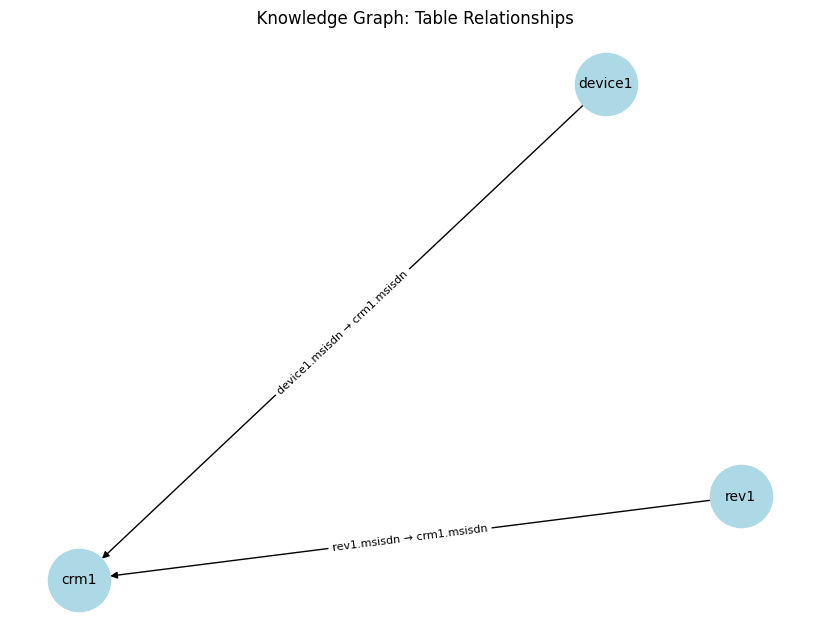

 Knowledge Graph created and saved.


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (tables)
for table in schema_data:
    G.add_node(table)

# Add edges (FK relationships)
for table, info in schema_data.items():
    fks = info.get("foreign_keys", {})
    for col, ref in fks.items():
        ref_table = ref.split(".")[0]
        G.add_edge(table, ref_table, label=f"{table}.{col} → {ref}")

# Visualize the KG
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("  Knowledge Graph: Table Relationships")
plt.tight_layout()
plt.savefig("knowledge_graph.png")
plt.show()

print(" Knowledge Graph created and saved.")


In [18]:
### Sample 5 Complex Natural Language Queries

In [19]:
queries_golden_query = {
    "Find the top 3 regions with the highest number of active subscriptions for plans costing more than 1000 per month.": 
        "SELECT Customers.region, COUNT(*) AS active_subscriptions\n"
        "FROM Subscriptions\n"
        "JOIN Customers ON Subscriptions.customer_id = Customers.customer_id\n"
        "JOIN Plans ON Subscriptions.plan_id = Plans.plan_id\n"
        "WHERE Plans.monthly_fee > 1000 AND (Subscriptions.end_date IS NULL OR Subscriptions.end_date > DATE('now'))\n"
        "GROUP BY Customers.region\n"
        "ORDER BY active_subscriptions DESC\n"
        "LIMIT 3;",

    "What is the average data usage of customers who raised more than 2 unresolved complaints?":
        "SELECT AVG(Usage.data_used_gb)\n"
        "FROM Usage\n"
        "WHERE Usage.customer_id IN (\n"
        "    SELECT Complaints.customer_id\n"
        "    FROM Complaints\n"
        "    WHERE Complaints.resolution_status != 'Resolved'\n"
        "    GROUP BY Complaints.customer_id\n"
        "    HAVING COUNT(*) > 2\n);",

    "List the names and complaint dates of customers who raised complaints in the last 30 days and are subscribed to a plan with a data limit below 10GB.":
        "SELECT Customers.name, Complaints.complaint_date\n"
        "FROM Complaints\n"
        "JOIN Customers ON Complaints.customer_id = Customers.customer_id\n"
        "JOIN Subscriptions ON Customers.customer_id = Subscriptions.customer_id\n"
        "JOIN Plans ON Subscriptions.plan_id = Plans.plan_id\n"
        "WHERE Complaints.complaint_date >= DATE('now', '-30 days')\n"
        "  AND Plans.data_limit_gb < 10;",

    "Which customers have used more data than the limit of their current subscribed plan in any month?":
        "SELECT DISTINCT Usage.customer_id\n"
        "FROM Usage\n"
        "JOIN Subscriptions ON Usage.customer_id = Subscriptions.customer_id\n"
        "JOIN Plans ON Subscriptions.plan_id = Plans.plan_id\n"
        "WHERE Usage.data_used_gb > Plans.data_limit_gb;",

    "Show all customers aged below 30 who have never raised a complaint and are on a plan that offers more than 300 voice minutes.":
        "SELECT DISTINCT Customers.customer_id, Customers.name\n"
        "FROM Customers\n"
        "JOIN Subscriptions ON Customers.customer_id = Subscriptions.customer_id\n"
        "JOIN Plans ON Subscriptions.plan_id = Plans.plan_id\n"
        "WHERE Customers.age < 30\n"
        "  AND Plans.voice_minutes > 300\n"
        "  AND Customers.customer_id NOT IN (\n"
        "      SELECT Complaints.customer_id FROM Complaints\n"
        "  );"
}


In [20]:
 ### Build Few-Shot Prompt Template

In [21]:
import yaml

def load_expanded_schema(schema_path="expanded_schema.yaml"):
    with open(schema_path, "r") as file:
        schema = yaml.safe_load(file)
    return schema
def build_semantic_schema_block(schema_dict):
    
    comment_block = "-- 📘 Available Tables, Columns, and Descriptions:\n"
    for table, table_data in schema_dict.items():
        comment_block += f"-- Table: {table}\n"
        for col_name, col_meta in table_data.get("columns", {}).items():
            desc = col_meta.get("description", "").strip().replace("\n", " ")
            comment_block += f"--    {col_name}: {desc}\n"
    comment_block += "-- ❗ Only use these columns. Do NOT hallucinate columns or tables. and create the structured sql query based on nl queries\n"
    return comment_block


In [22]:
FEW_SHOT_EXAMPLES = """
Q: Show total revenue generated by all users.
A: SELECT SUM(revenue) FROM rev1;

Q: List all customers using Samsung phones.
A: SELECT msisdn FROM device1 WHERE os_vendor = 'Samsung';

Q: How many male customers are there?
A: SELECT COUNT(*) FROM crm1 WHERE gender = 'Male';

Q: List all complaints by male customers.  -- complaints not in schema
A: SELECT msisdn FROM crm1 WHERE gender = 'Male';

Q: Show average age of users subscribed to Gold plan.  -- subscription info not in schema
A: SELECT AVG(age) FROM crm1;
"""

def build_schema_aware_prompt(nl_query, schema_path="expanded_schema.yaml"):
    schema_dict = load_expanded_schema(schema_path)
    schema_comment = build_semantic_schema_block(schema_dict)
    return f"{schema_comment}\n{FEW_SHOT_EXAMPLES}\n\nQ: {nl_query}\nA:"


In [23]:
#### Build Augmented Prompt Using Vector Embeddings + KG
##### Load vector store & retrieve relevant context

In [24]:
from sentence_transformers import util

def retrieve_context(nl_query, model, embeddings, metadata, top_k=5):
    query_vec = model.encode(nl_query)
    scores = util.cos_sim(query_vec, embeddings)[0]
    top_indices = scores.argsort(descending=True)[:top_k]
    return "\n".join([f"{metadata[i]['table']}.{metadata[i]['column']}: {metadata[i]['description']}" for i in top_indices])


In [25]:
#### Load KG context

In [26]:
def generate_kg_context(schema):
    kg_context = []
    for table, info in schema.items():
        fks = info.get("foreign_keys", {})
        for col, ref in fks.items():
            kg_context.append(f"{table}.{col} is a foreign key referencing {ref}")
    return "\n".join(kg_context)


In [27]:
## Build full augmented prompt

In [28]:
### Call OpenAI to Generate SQL

In [29]:
from openai import OpenAI
def generate_sql(prompt):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "user", "content": prompt}
        ],
        temperature=0
    )
    return response.choices[0].message.content.strip()


In [30]:
####### Run and Compare

In [31]:
### Exact Match (String Comparison)
def exact_match(sql1, sql2):
    return sql1.strip().lower() == sql2.strip().lower()


In [32]:
#### Execution Accuracy (on SQLite)
 
import sqlite3

# def execute_sql_and_compare(db_path, sql1, sql2):
#     conn = sqlite3.connect(db_path)
#     try:
#         result1 = conn.execute(sql1).fetchall()
#         result2 = conn.execute(sql2).fetchall()
#         return result1 == result2
#     except Exception as e:
#         return False
import sqlite3
import sqlite3
from difflib import SequenceMatcher

def fuzzy_row_similarity(row1, row2):
    """Compute similarity between two rows using string matching"""
    row1_str = " | ".join(map(str, row1))
    row2_str = " | ".join(map(str, row2))
    return SequenceMatcher(None, row1_str, row2_str).ratio()

def execute_sql_and_compare(db_path, sql1, sql2):
    db_name = "telecom_crm.db"
    conn = sqlite3.connect(db_name)
 
    try:
        result1 = conn.execute(sql1).fetchall()
        result2 = conn.execute(sql2).fetchall()

        if not result1 and not result2:
            return 100.0  # Both empty = perfect match
        if not result1 or not result2:
            return 0.0  # One empty = no match

        # Match each row in result1 with the best match in result2
        total_score = 0
        matched = set()
        for r1 in result1:
            best_score = 0
            best_match = -1
            for i, r2 in enumerate(result2):
                if i in matched:
                    continue
                score = fuzzy_row_similarity(r1, r2)
                if score > best_score:
                    best_score = score
                    best_match = i
            if best_match != -1:
                matched.add(best_match)
            total_score += best_score

        avg_score = (total_score / len(result1)) * 100
        return round(avg_score, 2)

    except Exception as e:
        # print("SQL Execution Error:", e)
        return 0.0


In [33]:
### Hallucination Check
 
def check_hallucination(sql, schema_columns):
    tokens = sql.replace("(", " ").replace(")", " ").replace(",", " ").split()
    hallucinated = [tok for tok in tokens if '.' in tok and tok not in schema_columns]
    return hallucinated

In [34]:
# def llm_rate_sql(nl_query, sql_output):
#     system_prompt = """You are a meticulous SQL reviewer.

# Given:
# - A natural language question (NL)
# - A generated SQL query

# You must score the SQL's quality only based on the original intent.

# Rate the following on a scale of 0 to 10:
# 1. Completeness: Does the SQL fully address the intent of the NL question?
# 2. Accuracy: Is the SQL logically and syntactically correct?
# 3. Readability: Is the SQL well-structured and easy to understand?

# Respond with only a JSON object:
# {
#   "completeness": int (0-10),
#   "accuracy": int (0-10),
#   "readability": int (0-10)
# }
# Do NOT explain your reasoning. Do NOT generate SQL. Just rate it.
# """

#     user_prompt = f"""NL Question:
# {nl_query}

# SQL Query:
# {sql_output}

# Rate this SQL based on the original question."""

#     response = client.chat.completions.create(
#         model="gpt-4o-mini",  # Use GPT-4 if quality is critical
#         messages=[
#             {"role": "system", "content": system_prompt},
#             {"role": "user", "content": user_prompt}
#         ]
#     )

#     raw_content = response.choices[0].message.content.strip()

#     try:
#         json_match = re.search(r'\{.*?\}', raw_content, re.DOTALL)
#         if json_match:
#             return json.loads(json_match.group())
#         else:
#             print("❌ No valid JSON found in LLM response.")
#             print("Raw response:", raw_content)
#             return {"completeness": 0, "accuracy": 0, "readability": 0}
#     except json.JSONDecodeError as e:
#         print("❌ JSON decoding failed:", e)
#         print("Raw response:", raw_content)
#         return {"completeness": 0, "accuracy": 0, "readability": 0}


In [35]:
import json
import re
def llm_rate_sql(nl_query, sql_output):
    

    system_prompt = """
You are a strict and expert SQL evaluator. Your task is to rate the following SQL query based on a given natural language question.
Rate it on the following 6 metrics, each from 0 to 10:

1. Completeness – Does the SQL answer **all parts** of the natural language question?
2. Accuracy – Is the SQL **logically and syntactically correct**, and does it return the **intended result**?
3. Readability – Is the SQL **easy to read, well-structured, and formatted properly**?
4. Hallucination – Does the SQL **avoid using any tables, columns, or logic that are not present or implied** in the given schema and context? (Higher score if hallucinations exist.)
5. Syntactic Similarity – How **structurally close** is the SQL to the ideal or ground truth SQL (e.g., joins, where conditions, groupings)?
6. Semantic Similarity – How **similar is the meaning or intent** of the SQL query compared to the expected SQL, even if worded or structured differently?

Respond ONLY in this **exact JSON format**, with no extra explanation:
{
  "completeness": <score from 0 to 10>,
  "accuracy": <score from 0 to 10>,
  "readability": <score from 0 to 10>,
  "hallucination": <score from 0 to 10>,
  "syntactic_similarity": <score from 0 to 10>,
  "semantic_similarity": <score from 0 to 10>
}
Do NOT include anything else outside the JSON.
"""


    user_prompt = f"""
Natural Language Question:
{nl_query}

Generated SQL Query:
{sql_output}

Please evaluate based on the above metrics.
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",  # or "gpt-4"
        messages=[
            {"role": "system", "content": system_prompt.strip()},
            {"role": "user", "content": user_prompt.strip()}
        ]
    )

    raw_content = response.choices[0].message.content.strip()

    try:
        json_match = re.search(r'\{.*?\}', raw_content, re.DOTALL)
        if json_match:
            return json.loads(json_match.group())
        else:
            print("❌ No valid JSON found in LLM response.")
            print("Raw response:", raw_content)
            return {"completeness": 0, "accuracy": 0, "readability": 0}
    except json.JSONDecodeError as e:
        print("❌ JSON decoding failed:", e)
        print("Raw response:", raw_content)
        return {"completeness": 0, "accuracy": 0, "readability": 0}


In [36]:
import faiss
def build_augmented_prompt_and_evaluate(nl_query, model, embeddings, metadata, schema, db_path, ground_truth_sql=None):
    # Step 1: Context Augmentation
    # context_from_vec = retrieve_context(nl_query, model, embeddings, metadata)

   
    embedding_dim = embeddings.shape[1]
    index = faiss.IndexFlatL2(embedding_dim)
    index.add(embeddings)
    
    context_from_vec = retrieve_context(
    user_question=nl_query,
    index=index,       # FAISS index
    model=model,   # SentenceTransformer("all-MiniLM-L6-v2")
    sentences=metadata
    )

    context_from_kg = generate_kg_context(schema)


    allowed_tables = ', '.join(schema.keys())
    allowed_columns = [f"{t}.{col}" for t in schema for col in schema[t]["columns"]]
    allowed_columns_flat = ', '.join(allowed_columns)

    prompt = f"""
You are an expert SQL assistant.

Only use the following tables: {allowed_tables}
Only use the following columns: {allowed_columns_flat}

Schema Descriptions:
{context_from_vec}

Known Relationships:
{context_from_kg}

Write only the SQL query. Do not explain.

NL Question:
{nl_query}

SQL:
"""

    # Step 2: Generate SQL
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
        {"role": "user", "content": prompt}
    ]
    )
    generated_sql = response.choices[0].message.content.strip()

    
    # Step 3: Run Evaluation Metrics
    result_dict = {
        "query": nl_query,
        "sql_generated": generated_sql,
        "exact_match": None,
        "execution_accuracy": None,
        "semantic_similarity": None,
        "hallucination": None,
        "llm_rating": None
    }

    if ground_truth_sql:
        result_dict["exact_match"] = generated_sql.strip().lower() == ground_truth_sql.strip().lower()

        # Use difflib for semantic similarity
        result_dict["semantic_similarity"] = SequenceMatcher(None, generated_sql, ground_truth_sql).ratio()
    
    # Execution check
    result_gen = execute_sql_and_compare(db_path, generated_sql,ground_truth_sql)
  
    if isinstance(result_gen, str):
        result_dict["execution_accuracy"] = False
    else:
        result_dict["execution_accuracy"] = True

    # Hallucination check
    valid_columns = [f"{t}.{c}" for t in schema for c in schema[t]["columns"]]
    result_dict["hallucination"] = check_hallucination(generated_sql, valid_columns)
    

    
    # LLM judge
    result_dict["llm_rating"] = llm_rate_sql(nl_query, generated_sql)
   
    return prompt, generated_sql, result_dict

### RDF ->triple

In [37]:
import yaml
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
from openai import OpenAI
import os

# Step 1: Load YAML Schema
def load_schema(yaml_path):
    with open(yaml_path, 'r') as file:
        return yaml.safe_load(file)



In [38]:
# Step 2: Generate RDF Triplets
def generate_rdf_triplets(schema_dict):
    triplets = []

    for table_name, table_info in schema_dict.items():
        columns = table_info.get("columns", {})
        primary_key = table_info.get("primary_key", None)
        foreign_keys = table_info.get("foreign_keys", {})

        # Column-level triplets
        for col_name, col_info in columns.items():
            triplets.append((table_name, "has_column", col_name))

            if col_name == primary_key:
                triplets.append((table_name, "has_primary_key", col_name))

            if "data_type" in col_info:
                triplets.append((f"{table_name}.{col_name}", "has_data_type", col_info["data_type"]))

            if "sample_value" in col_info:
                 desc = col_info["sample_value"]
                 triplets.append((f"{table_name}.{col_name}", "sample_value_of", desc[:80] + ("..." if len(desc) > 80 else "")))

            # if "description" in col_info:
            #     desc = col_info["description"]
            #     triplets.append((f"{table_name}.{col_name}", "has_description", desc[:80] + ("..." if len(desc) > 80 else "")))

        # Foreign key triplets
        for fk_col, fk_value in foreign_keys.items():
            if isinstance(fk_value, str) and '.' in fk_value:
                ref_table, ref_col = fk_value.split('.', 1)
                triplets.append((table_name, "has_foreign_key", f"{fk_col} -> {ref_table}.{ref_col}"))
            elif isinstance(fk_value, dict):
                ref_table = fk_value.get("references", {}).get("table", "unknown")
                ref_col = fk_value.get("references", {}).get("column", "unknown")
                triplets.append((table_name, "has_foreign_key", f"{fk_col} -> {ref_table}.{ref_col}"))

    return triplets


In [39]:
# Step 3: Embed and Store Triplets using FAISS
def embed_and_store_triplets(triplets):
    model = SentenceTransformer("all-MiniLM-L6-v2")
    sentences = [f"{s} {p} {o}" for s, p, o in triplets]
    embeddings = model.encode(sentences)

    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(np.array(embeddings).astype('float32'))
    return index, model, sentences

# Step 4: Get top-k triplet contexts based on user question


In [40]:
def retrieve_context(user_question, index, model, sentences, k=5):
    query_vec = model.encode([user_question])
    D, I = index.search(np.array(query_vec).astype('float32'), k)
    return [sentences[i] for i in I[0]]



In [41]:
# Step 5: LLM Prompt and SQL Generation
def generate_sql_from_context(context, user_question, client, model_name="gpt-4o-mini"):
    context_text = "\n".join(context)
    prompt = f"""
# Knowledge Context:
{context_text}

# User Question:
{user_question}

# SQL:
"""
    response = client.chat.completions.create(
        model=model_name,
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    return response.choices[0].message.content.strip()



In [42]:
# import yaml

# def load_schema(yaml_path):
#     with open(yaml_path, 'r') as f:
#         return yaml.safe_load(f)


In [43]:
def generate_context_from_triplets(triplets):
    return "\n".join([f"{h} {r} {t}" for h, r, t in triplets])

In [46]:
### visualize the triplex

schema_path = "expanded_schema.yaml"
schema_dict = load_schema(schema_path)
triplets = generate_rdf_triplets(schema_dict)



for t in triplets:
    print(t)


# def visualize_triplets(triplets, max_edges=10):
#     G = nx.DiGraph()
    
#     # Add only the first few triplets to avoid clutter
#     for head, relation, tail in triplets[:max_edges]:
#         G.add_edge(head, tail, label=relation)

#     pos = nx.spring_layout(G, k=0.8)
#     plt.figure(figsize=(12, 6))

#     # Draw nodes and edges
#     nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, font_size=10, arrows=True, edge_color='gray')
    
#     # Draw edge labels (relation)
#     edge_labels = nx.get_edge_attributes(G, 'label')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)

#     plt.title("RDF Triplet Graph (Sample)", fontsize=14)
#     plt.axis('off')
#     plt.show()



# visualize_triplets(triplets, max_edges=13)

('crm1', 'has_column', 'msisdn')
('crm1', 'has_primary_key', 'msisdn')
('crm1.msisdn', 'has_data_type', 'object')
('crm1.msisdn', 'sample_value_of', '0003c4a6a80456a3331880cb4e2b1402')
('crm1', 'has_column', 'gender')
('crm1.gender', 'has_data_type', 'object')
('crm1.gender', 'sample_value_of', 'Not Available')
('crm1', 'has_column', 'year_of_birth')
('crm1.year_of_birth', 'has_data_type', 'int64')
('crm1.year_of_birth', 'sample_value_of', '1992')
('crm1', 'has_column', 'system_status')
('crm1.system_status', 'has_data_type', 'object')
('crm1.system_status', 'sample_value_of', 'ACTIVE')
('crm1', 'has_column', 'mobile_type')
('crm1.mobile_type', 'has_data_type', 'object')
('crm1.mobile_type', 'sample_value_of', 'Prepaid')
('crm1', 'has_column', 'value_segment')
('crm1.value_segment', 'has_data_type', 'object')
('crm1.value_segment', 'sample_value_of', 'Tier_3')
('device1', 'has_column', 'msisdn')
('device1.msisdn', 'has_data_type', 'object')
('device1.msisdn', 'sample_value_of', 'bc6f4d

#### -----------------------------------------------------

In [45]:
import json
import yaml
import numpy as np
from sentence_transformers import SentenceTransformer

# Load metadata
with open("column_metadata.json") as f:
    metadata = json.load(f)

# Load schema
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = np.load("column_embeddings.npy", allow_pickle=True)
with open("expanded_schema.yaml") as f:
    schema = yaml.safe_load(f)

# Your local SQLite DB
db_path = "telco.db"

# Run for top 5 complex queries
queries=list(queries_golden_query.keys())
for i, q in enumerate(queries[0:5]):  # change [:5] as needed
    print(f"\n\n========================== QUERY {i+1} ==========================")
    print("🔹 Original Question:", q)

    # =============== RDF TRIPLET ==================================================

    yaml_path = "expanded_schema.yaml"
    schema_dict = load_schema(yaml_path)
    triplets = generate_rdf_triplets(schema_dict)
    
    # Embed and Store
    index, model, triplet_sentences = embed_and_store_triplets(triplets)
    
     
    
    # Retrieve context
    top_k_context = retrieve_context(q, index, model, triplet_sentences)
    
    # Generate SQL from LLM
     
      # make sure your API key is set via environment or config
    response_sql = generate_sql_from_context(top_k_context, q, client)

    print("\n➡️ Generated Triplet SQL:\n", response_sql)
     

    # ==== EVALUATE TRIPLET SQL ====
    triplet_eval = {
        "execution_accuracy": None,
        "hallucination_term": None,
        "semantic_similarity": None,
        "llm_rating": None
    }
    
    triplet_eval["execution_accuracy"] = not isinstance(
        execute_sql_and_compare(db_path, response_sql, queries_golden_query[q]),
        str
    )
    
    valid_columns = [f"{t}.{c}" for t in schema for c in schema[t]["columns"]]
    triplet_eval["hallucination_term"] = check_hallucination(response_sql, valid_columns)
    
    if "ground_truth_sqls" in locals() and ground_truth_sqls[i]:
        gt_sql = ground_truth_sqls[i]
        triplet_eval["semantic_similarity"] = SequenceMatcher(None, response_sql, gt_sql).ratio()
    
    triplet_eval["llm_rating"] = llm_rate_sql(q, response_sql)
    
     

    # ==== FEW-SHOT PROMPTING ====
    few_shot_prompt = build_schema_aware_prompt(q)

  
    few_shot_sql = generate_sql(few_shot_prompt)
    print("➡️ Few-shot SQL:\n", few_shot_sql)



    
    # Evaluate Few-shot SQL
    few_shot_eval = {
        "execution_accuracy": None,
        "hallucination_term": None,
        "semantic_similarity": None,
        "llm_rating": None
    }

    few_shot_eval["execution_accuracy"] = not isinstance(execute_sql_and_compare(db_path, few_shot_sql,queries_golden_query[q]), str)

    valid_columns = [f"{t}.{c}" for t in schema for c in schema[t]["columns"]]
    few_shot_eval["hallucination_term"] = check_hallucination(few_shot_sql, valid_columns)

    # Optional: compare with ground truth if available
    if "ground_truth_sqls" in locals() and ground_truth_sqls[i]:
        gt_sql = ground_truth_sqls[i]
        few_shot_eval["semantic_similarity"] = SequenceMatcher(None, few_shot_sql, gt_sql).ratio()

    # LLM rating
    few_shot_eval["llm_rating"] = llm_rate_sql(q, few_shot_sql)


    # ==== CONTEXT-AUGMENTED PROMPTING ====
    aug_prompt, aug_sql, aug_eval = build_augmented_prompt_and_evaluate(
        nl_query=q,
        model=model,
        embeddings=embeddings,
        metadata=metadata,
        schema=schema,
        db_path=db_path,
        ground_truth_sql=ground_truth_sqls[i] if "ground_truth_sqls" in locals() else None
    )

    print("➡️ Augmented SQL:\n", aug_sql)


    # ==== SIDE-BY-SIDE COMPARISON ====
    # ==== FINAL COMPARISON TABLE ====
    def yes_no(val): return '✅' if val else '❌'
    
    print("\n📊 Evaluation Comparison:")
    print("{:<25} {:<15} {:<15} {:<15}".format("Metric", "Few-shot", "Augmented", "Triplet"))
    print("-" * 80)
    print("{:<25} {:<15} {:<15} {:<15}".format(
        "Execution Accuracy",
        yes_no(few_shot_eval["execution_accuracy"]),
        yes_no(aug_eval["execution_accuracy"]),
        yes_no(triplet_eval["execution_accuracy"])
    ))
    
    if all([few_shot_eval["semantic_similarity"], aug_eval["semantic_similarity"], triplet_eval["semantic_similarity"]]):
        print("{:<25} {:<15.2f} {:<15.2f} {:<15.2f}".format(
            "Semantic Similarity",
            few_shot_eval["semantic_similarity"],
            aug_eval["semantic_similarity"],
            triplet_eval["semantic_similarity"]
        ))
    
    if all([few_shot_eval["llm_rating"], aug_eval["llm_rating"], triplet_eval["llm_rating"]]):
        print("{:<25} {:<15} {:<15} {:<15}".format("Accuracy",
            f"{few_shot_eval['llm_rating']['accuracy']}/10",
            f"{aug_eval['llm_rating']['accuracy']}/10",
            f"{triplet_eval['llm_rating']['accuracy']}/10"))
    
        print("{:<25} {:<15} {:<15} {:<15}".format("Completeness",
            f"{few_shot_eval['llm_rating']['completeness']}/10",
            f"{aug_eval['llm_rating']['completeness']}/10",
            f"{triplet_eval['llm_rating']['completeness']}/10"))
    
        print("{:<25} {:<15} {:<15} {:<15}".format("Hallucination",
            f"{few_shot_eval['llm_rating']['hallucination']}/10",
            f"{aug_eval['llm_rating']['hallucination']}/10",
            f"{triplet_eval['llm_rating']['hallucination']}/10"))
    
        print("{:<25} {:<15} {:<15} {:<15}".format("Readability",
            f"{few_shot_eval['llm_rating']['readability']}/10",
            f"{aug_eval['llm_rating']['readability']}/10",
            f"{triplet_eval['llm_rating']['readability']}/10"))
    
    print("=" * 80)



========================== QUERY 1 ==========================
🔹 Original Question: Find the top 3 regions with the highest number of active subscriptions for plans costing more than 1000 per month.


/home/jupyter-admin_user_name/.local/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



➡️ Generated Triplet SQL:
 To find the top 3 regions with the highest number of active subscriptions for plans costing more than 1000 per month, you can use the following SQL query. This assumes you have a table that contains subscription data, including the region, subscription status, and plan cost.

```sql
SELECT 
    region,
    COUNT(*) AS active_subscriptions
FROM 
    subscriptions
WHERE 
    plan_cost > 1000
    AND status = 'active'
GROUP BY 
    region
ORDER BY 
    active_subscriptions DESC
LIMIT 3;
```

### Explanation:
- **SELECT region, COUNT(*) AS active_subscriptions**: This selects the region and counts the number of active subscriptions in that region.
- **FROM subscriptions**: This specifies the table from which to retrieve the data.
- **WHERE plan_cost > 1000 AND status = 'active'**: This filters the results to include only those subscriptions with a plan cost greater than 1000 and that are currently active.
- **GROUP BY region**: This groups the results by region 